# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Read Data

In [2]:
housing = pd.read_csv('data/housing.csv')

In [3]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing[housing["total_rooms"]>1.5*abs(1447-3148)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20606,-121.57,39.12,30.0,2601.0,534.0,1702.0,506.0,2.0800,56600.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND


In [7]:
X = housing.drop(['median_house_value','ocean_proximity'],axis=1)

In [8]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [9]:
X = housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].copy()

In [10]:
X = X.dropna(axis=1)

In [11]:
y=housing['median_house_value'].copy()

In [12]:
y.head(2)

0    452600.0
1    358500.0
Name: median_house_value, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.metrics import mean_squared_error
lin_reg_pred=lin_reg.predict(X_train)
lin_reg_mse = mean_squared_error(y_train,lin_reg_pred)
lin_reg_mse

5798038784.986219

In [16]:
lin_reg_pred=lin_reg.predict(X_test)
lin_reg_mse = mean_squared_error(y_test,lin_reg_pred)
lin_reg_mse

5909928044.702562

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [18]:
from sklearn.metrics import mean_squared_error
Tree_reg_pred=tree_reg.predict(X_train)
Tree_reg_mse = mean_squared_error(y_train,Tree_reg_pred)
Tree_reg_mse

0.0

In [19]:
Tree_reg_pred=tree_reg.predict(X_test)
Tree_reg_mse = mean_squared_error(y_test,Tree_reg_pred)
Tree_reg_mse

8951793839.099806

# Trying preprocessing

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
import sklearn
sklearn.__version__

'0.21.3'

# Plots and Charts

## Pandas Histogram for numerical data

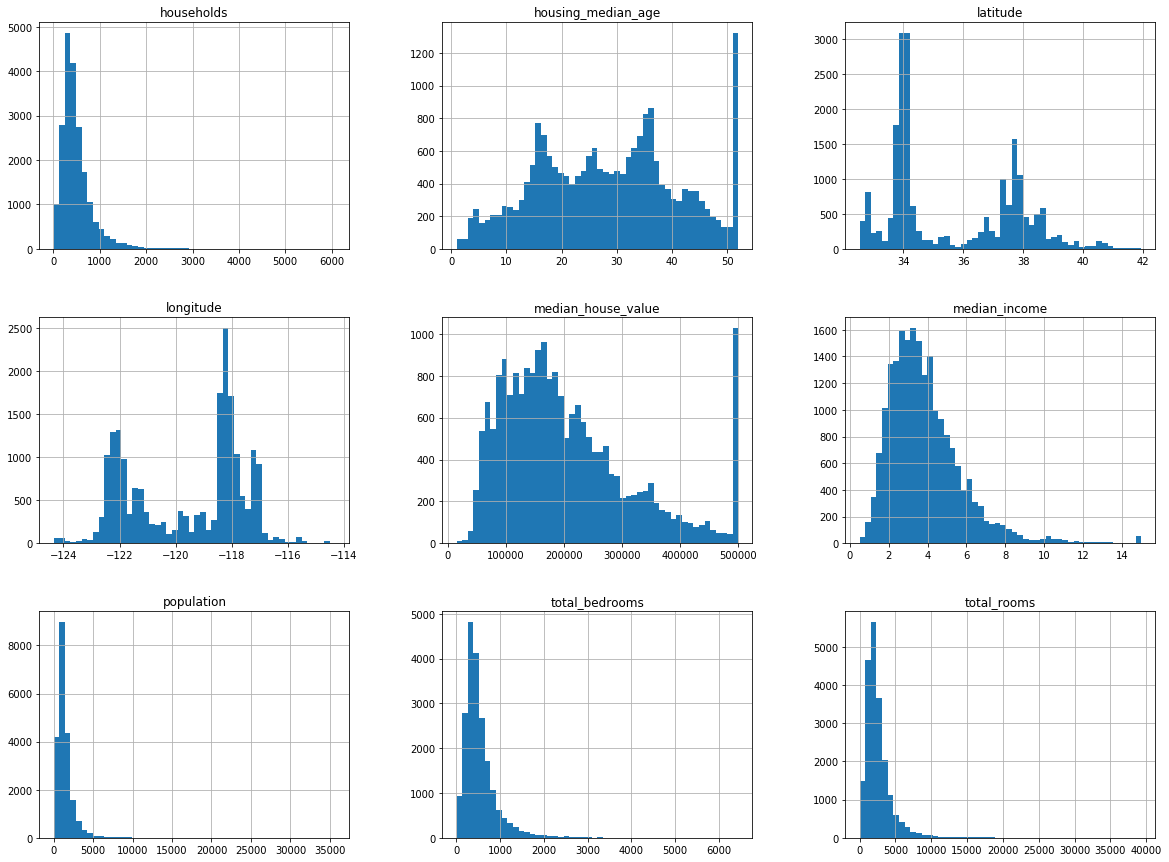

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Pandas Scatter Matrix and corr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014A76B7DF48>,
      dtype=object)

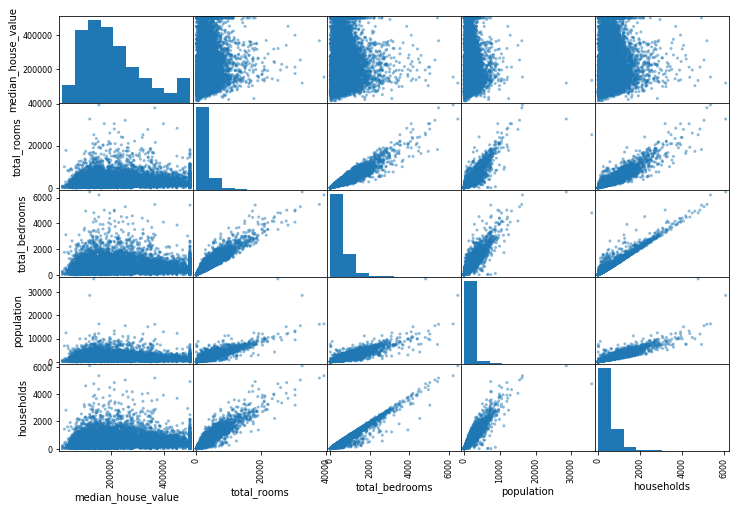

In [31]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value',
            'total_rooms',
            'total_bedrooms', 
            'population', 
            'households' 
            ]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [32]:
housing[attributes].corr()

,median_house_value,total_rooms,total_bedrooms,population,households
median_house_value,1.000000,0.134153,0.049686,-0.024650,0.065843
total_rooms,0.134153,1.000000,0.930380,0.857126,0.918484
total_bedrooms,0.049686,0.930380,1.000000,0.877747,0.979728
population,-0.024650,0.857126,0.877747,1.000000,0.907222
households,0.065843,0.918484,0.979728,0.907222,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014A716DB848>,
      dtype=object)

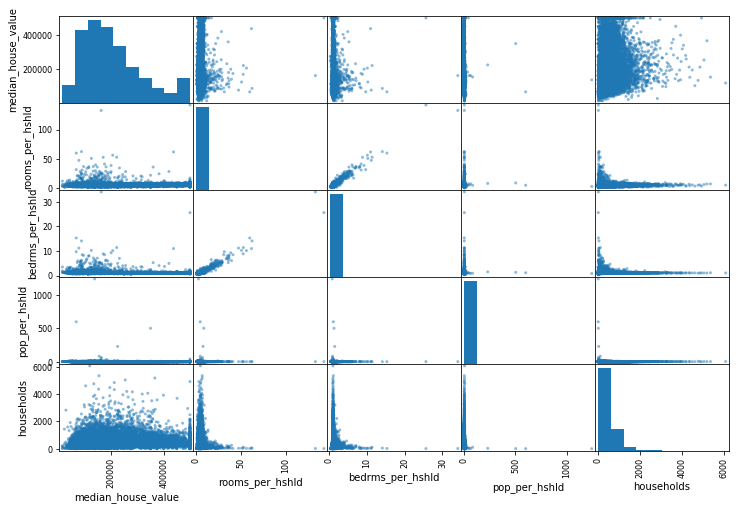

In [33]:
from pandas.plotting import scatter_matrix

housing_copy = housing.copy()
housing_copy["rooms_per_hshld"]=housing_copy["total_rooms"]/housing_copy["households"]
housing_copy["bedrms_per_hshld"]=housing_copy["total_bedrooms"]/housing_copy["households"]
housing_copy["pop_per_hshld"]=housing_copy["population"]/housing_copy["households"]

attributes=['median_house_value',
            'rooms_per_hshld',
            'bedrms_per_hshld', 
            'pop_per_hshld', 
            'households' 
            ]
scatter_matrix(housing_copy[attributes], figsize=(12, 8))

In [34]:
housing_copy[attributes].corr()

,median_house_value,rooms_per_hshld,bedrms_per_hshld,pop_per_hshld,households
median_house_value,1.000000,0.151948,-0.046739,-0.023737,0.065843
rooms_per_hshld,0.151948,1.000000,0.848616,-0.004852,-0.080598
bedrms_per_hshld,-0.046739,0.848616,1.000000,-0.006179,-0.055158
pop_per_hshld,-0.023737,-0.004852,-0.006179,1.000000,-0.027309
households,0.065843,-0.080598,-0.055158,-0.027309,1.000000


# Correlation of columns

In [35]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [36]:
housing_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_hshld,bedrms_per_hshld,pop_per_hshld
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.013402,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.070025,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.077918,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,0.029373,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.045887,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.066510,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.055158,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.062299,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.046739,-0.023737
rooms_per_hshld,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.848616,-0.004852


# Handling Null Values

In [37]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [38]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [39]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [41]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


## Simple Imputer

In [43]:
housing_num = housing.drop("ocean_proximity", axis=1)
#housing_num = housing.select_dtypes(include=[np.number]) #Option2
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [48]:
temp=imputer.transform(housing_num)
housing_tr = pd.DataFrame(temp, columns=housing_num.columns,
                          index = list(housing.index.values))
housing_tr
sample_incomplete_rows = housing_tr[housing_tr.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


# Handling Character Values

In [49]:
# Ordinal Encoder
# LabelEncoder
# One Hot Encoder

# Pipe Line

In [ ]:
num_attr = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
       
cat_attr = ["ocean_proximity"]